<a href="https://colab.research.google.com/github/Ha-minss/Classes-in-University/blob/main/Term2%20-%20ML%20-%20Week1%20-%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [7]:
data = fetch_california_housing()

In [9]:
x = data.data[:, data.feature_names.index("MedInc")].reshape(-1,1)  # 중위소득 하나만
y = data.target  # 주택 가격(단위: $100k)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [11]:
#선형회귀
lr = LinearRegression().fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [12]:
#다항회귀
poly = PolynomialFeatures(degree=2, include_bias= False)
x2_train = poly.fit_transform(x_train)
x2_test = poly.transform(x_test)

pr2 = LinearRegression().fit(x2_train, y_train)
y_pred_pr2 = pr2.predict(x2_test)

In [13]:
mse_lr  = mean_squared_error(y_test, y_pred_lr)
mse_pr2 = mean_squared_error(y_test, y_pred_pr2)

print(f"선형회귀 MSE: {mse_lr:.3f}")
print(f"2차 다항회귀 MSE: {mse_pr2:.3f}")

선형회귀 MSE: 0.692
2차 다항회귀 MSE: 0.686


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

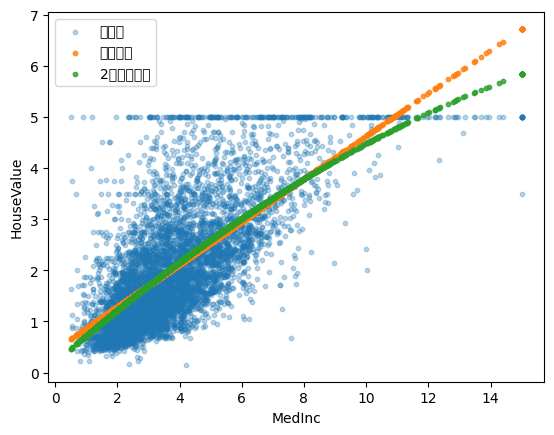

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, s=10, alpha=0.3, label="실제값")
plt.scatter(x_test, y_pred_lr,  s=10, alpha=0.8, label="선형예측")
plt.scatter(x_test, y_pred_pr2, s=10, alpha=0.8, label="2차다항예측")
plt.xlabel("MedInc")
plt.ylabel("HouseValue")
plt.legend()
plt.show()